# Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data Wrangling

In [2]:
data_path = "data/"
files_name = os.listdir(data_path)
print("File list: ", files_name)
print("Count of file: ", len(files_name))

File list:  ['PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'PRSA_Data_Changping_20130301-20170228.csv', 'PRSA_Data_Dingling_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Guanyuan_20130301-20170228.csv', 'PRSA_Data_Gucheng_20130301-20170228.csv', 'PRSA_Data_Huairou_20130301-20170228.csv', 'PRSA_Data_Nongzhanguan_20130301-20170228.csv', 'PRSA_Data_Shunyi_20130301-20170228.csv', 'PRSA_Data_Tiantan_20130301-20170228.csv', 'PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']
Count of file:  12


## Gathering data

In [3]:
# fungsi untuk membaca data berdasarkan index files_name
def read_data(idx: int) -> pd.DataFrame:
    path = "data/" + files_name[idx]
    return pd.read_csv(path, index_col="No")

### Check data index ke 1 dan 5

In [4]:
df_1 = read_data(1)
df_1.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [5]:
df_5 = read_data(5)
df_5.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


## Merging All Data
Menggabungkan semua dataset kedalam 1 file yang diberi nama "all_data.csv"

In [6]:
df = pd.concat([pd.read_csv(f"data/{file_name}") for file_name in files_name])
df.drop(columns=["No"], inplace=True) # Remove "No" column
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


# Asessing Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 57.8+ MB


Dari tipe data, semuanya terlihat baik atau sesuai :)

## Check Duplicate Data

In [8]:
print(df.duplicated().sum())

# Wooowwww.. 400k data tidak ada data duplikat! AMAZINNNGG!!!  

0


In [9]:
# stats
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


# Cleaning Data

## Check Missing Value

In [10]:
mv = df.isna().sum().sort_values(ascending=False)
mv = mv[mv > 0] # I just pick columns which it have missing value
mv

CO       20701
O3       13277
NO2      12116
SO2       9021
PM2.5     8739
PM10      6449
wd        1822
DEWP       403
TEMP       398
PRES       393
RAIN       390
WSPM       318
dtype: int64

Data Missing terbanyak terdapat pada kolom CO (Karbon Monoksida)

In [11]:
total_mv = df.isna().sum().values.sum()
pct_mv = 1 - ((len(df) - total_mv) / len(df))
print(f"Total Missing Value: {total_mv}")
print(f"Percentage Missing Value: {pct_mv * 100:.2f}%")

Total Missing Value: 74027
Percentage Missing Value: 17.59%


Alright.. that's so many Missing Value. if I drop it maybe I will lost some information. I decided to impute this the data using "mean" value for each column.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 57.8+ MB


In [13]:
cols_mv = mv.index

for col in cols_mv:
    if df[col].dtype != "object":
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

total_mv = df.isna().sum().values.sum()
pct_mv = 1 - ((len(df) - total_mv) / len(df))
print(f"Total Missing Value: {total_mv}")
print(f"Percentage Missing Value: {pct_mv * 100:.2f}%")

Total Missing Value: 0
Percentage Missing Value: 0.00%


Horayyyyyyyyyyyyyyyyyy

In [14]:
# Save result of merging
df.to_csv("dashboard/all_data.csv", index=False)

# Exploratory Data Analysis
Objective: <br>

1. Bagaimana correlation matrix dari dataset?
2. Jumlah station terbanyak pada dataset?
3. Bagaimana trend PM2.5, PM10, TEMP, O3, DEWP pada station X?


### Bagaimana Correlation Matrix dari dataset?

<Axes: >

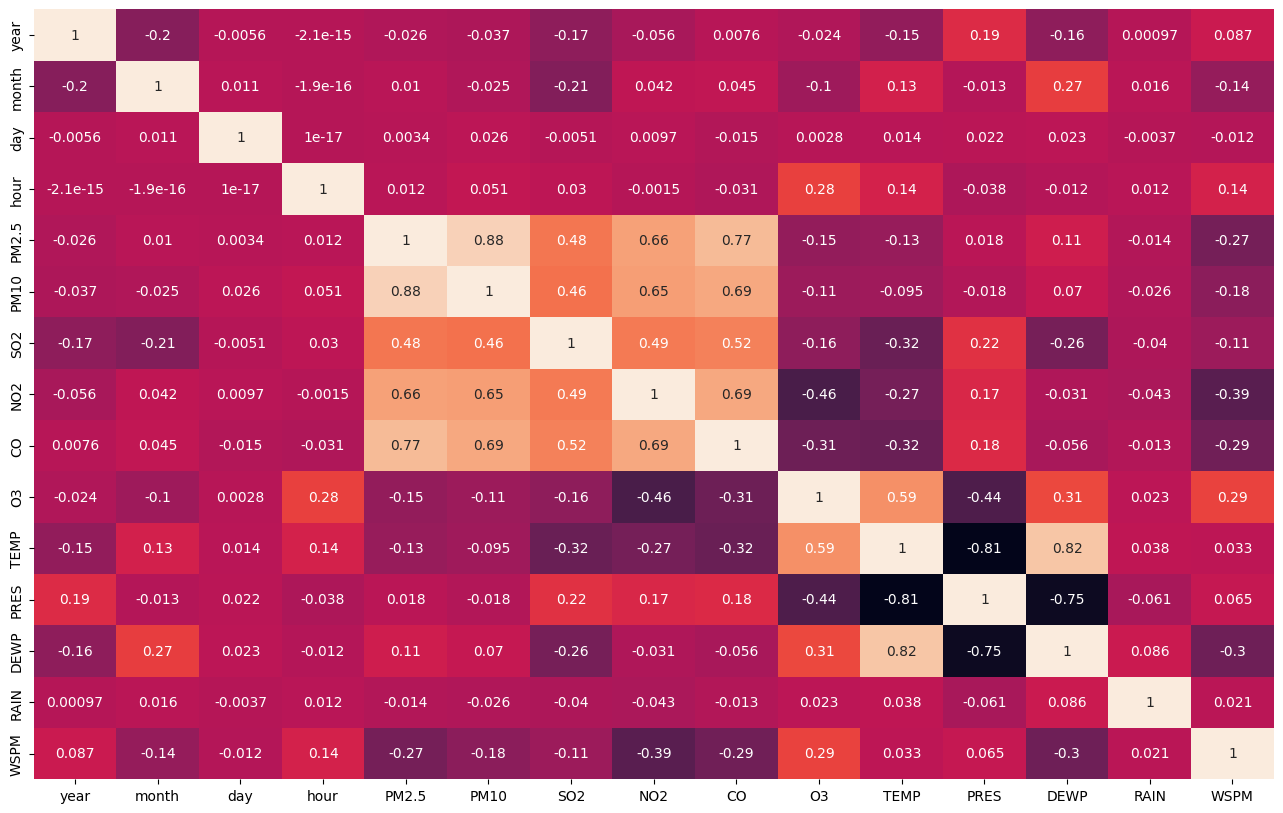

In [85]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.drop(columns=["wd", "station"]).corr(), annot=True, cbar=False)

### Jumlah station terbanyak pada dataset?

<Axes: xlabel='station', ylabel='count'>

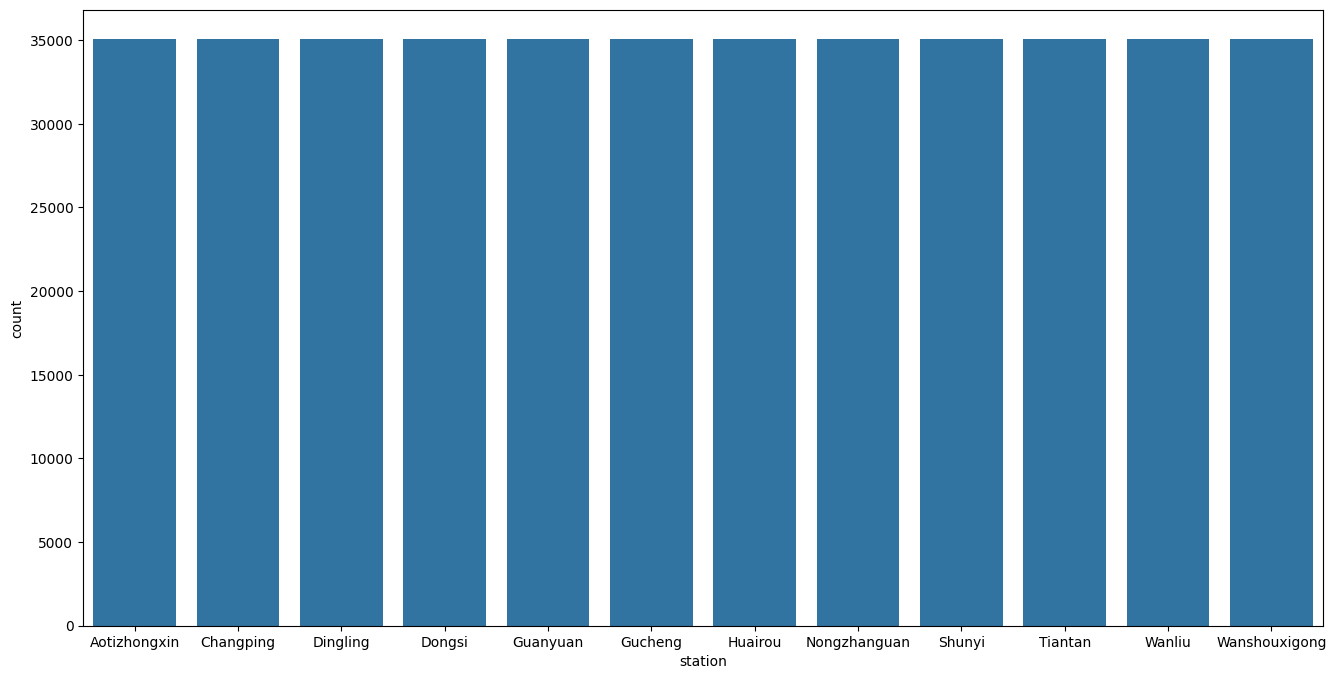

In [87]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x="station")

Data terlihat balance!

### Bagaimana trend PM2.5, PM10, TEMP, O3, DEWP pada station X?

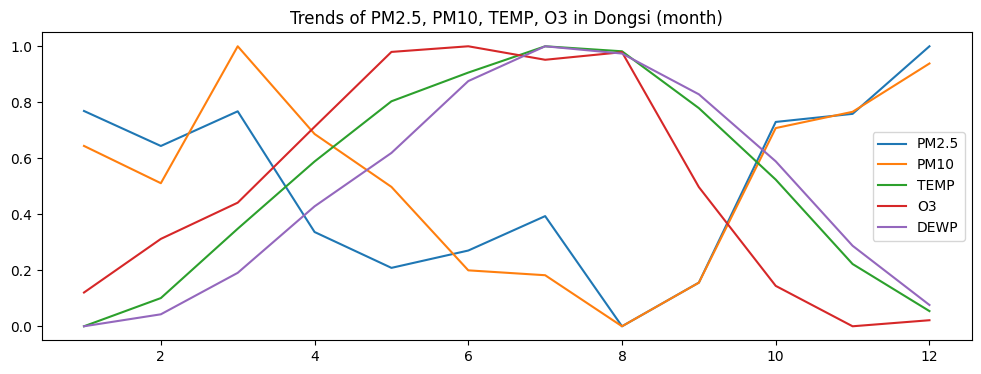

In [143]:
def trends(city: str, period: str = "year"):
    plt.figure(figsize=(12, 4))
    data = df[df["station"] == city]

    if period == "year":
        pivot = data.groupby('year')[['PM2.5', 'PM10', "TEMP", "O3", "DEWP"]].mean().reset_index()
    elif period == "month":
        pivot = data.groupby('month')[['PM2.5', 'PM10', "TEMP", "O3", "DEWP"]].mean().reset_index()
    else:
        pivot = data.groupby('day')[['PM2.5', 'PM10', "TEMP", "O3", "DEWP"]].mean().reset_index()

    # Normalize data menggunakan Min-Max scaler -> x_scaled = (x - min(x)) / (max(x) - min(x))
    cols_to_normalize = ['PM2.5', 'PM10', "TEMP", "O3", "DEWP"]
    pivot[cols_to_normalize] = (pivot[cols_to_normalize] - pivot[cols_to_normalize].min()) / (pivot[cols_to_normalize].max() - pivot[cols_to_normalize].min())

    cols = [col for col in pivot.columns if col != period]
    for col in cols:
        plt.plot(pivot[period], pivot[col])

    plt.title(f"Trends of PM2.5, PM10, TEMP, O3 in {city} ({period})")
    plt.legend(cols)

trends("Dongsi", "month")

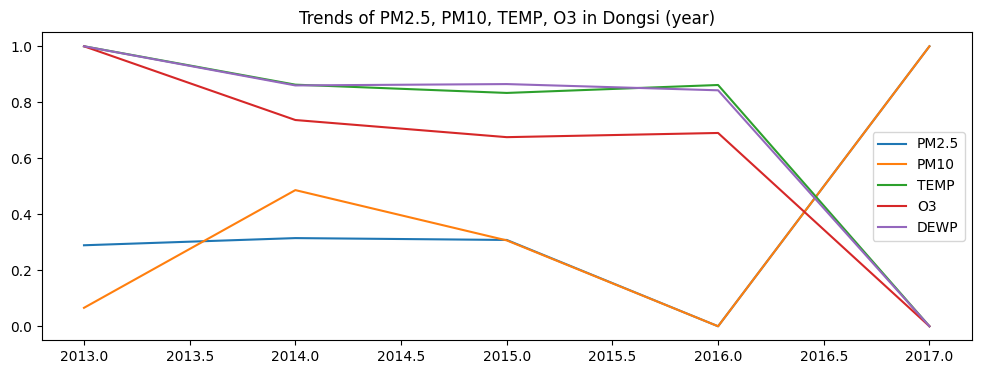

In [144]:
trends("Dongsi", "year")

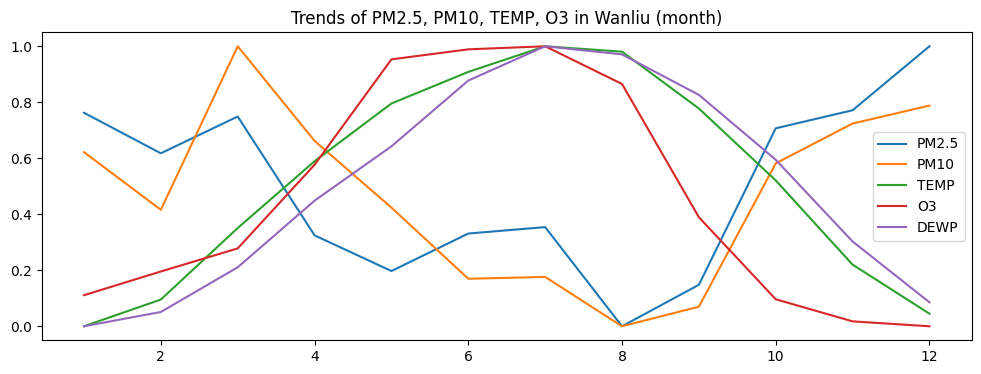

In [145]:
trends("Wanliu", "month")

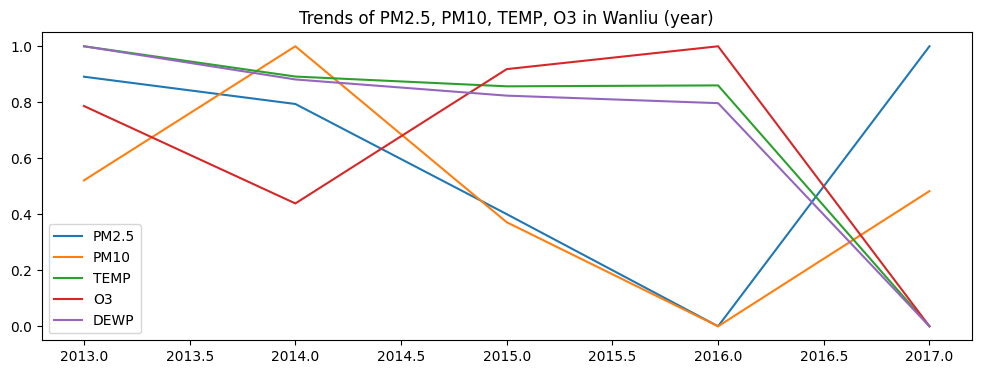

In [146]:
trends("Wanliu", "year")

### Kesimpulan:
**Pertanyaan 1**
- PM2.5 berkolerasi kuat dengan PM10 (0.88) -> Konsentrasi partikel debu 2.5mm berkolerasi kuat dengan debu 10mm
- DEWP berkolerasi kuat dengan TEMP (0.82) -> Titik embun berkolerasi kuat dengan Suhu udara [make sense]
- PM2.5 berkolarasi kuat dengan CO (0.77) -> Konsentrasi partikel debu 2.5mm berkolerasi kuat dengan konsentrasi karbon monoksida

**Pertanyaan 2**
- Data terlihat balance!

**Pertanyaan 3**
- Dari 2 kota tersebut terlihat bahwa trend DEWP, TEMP, O3 mulai menaik disekitar bulan ke 3 (maret) dan menurun di bulan ke 8 (Agustus). Menariknya bertolak belakang dengan PM2.5 dan PM10.
- Kota cenderung berdebu pada quartal ketiga (Q3).
- Jika ingin berkunjung ke kota tersebut disarankan di bulan ke 8 (Agustus) karena PM2.5 dan PM10 nya rendah
- Jika dilihat dari trend tahunan kedua kota tersebut mengalami kenaikan konsentrasi debu (PM2.5 dan PM10) pada tahun 2016